In [ ]:
# run IPYNB that imports all the relevant packages and functions
%run ../ms_packages_and_functions.ipynb

In [3]:
output_dir = pjoin(os.getcwd(), 'processed_data')
data_dir   = pjoin(os.getcwd(), 'raw_data')


In [ ]:
folder_path = pjoin(output_dir,'FN-metrics','Reciprocity')

if not os.path.exists(folder_path):
    os.mkdir(folder_path)
    print("created directory: {}".format(folder_path))
else:
    print("All files will be saved in: {}".format(folder_path))


In [ ]:
fig_dir    = pjoin(folder_path,'figures')
if not os.path.exists(fig_dir):
    os.mkdir(fig_dir)
    print("created directory: {}".format(fig_dir))
else:
    print("All figures will be saved in: {}".format(fig_dir))

In [6]:
folders = {'RS' : 'processed_data/paper-extra-analysis/data/RS_null-metrics-reciprocity-cutoff-thresholdNodeWise-003',
           'RJ' : 'processed_data/paper-extra-analysis/data/RJ_null-metrics-reciprocity-cutoff-thresholdNodeWise-001'}

# Plot

In [ ]:
rec_vals={}
minima_times = {}
thresholds = np.arange(85,91)
for x in thresholds:
    rec_vals[x] = {'RS':{'data':{'mean':[],'err':[]},'ave-null':{'mean':[],'err':[]},'norm':{'mean':[],'err':[]}},
                'RJ':{'data':{'mean':[],'err':[]},'ave-null':{'mean':[],'err':[]},'norm':{'mean':[],'err':[]}}}
    minima_times[x] = {'RS':{'data':{'mean':[],'err':[]},'ave-null':{'mean':[],'err':[]},'norm':{'mean':[],'err':[]}},
                'RJ':{'data':{'mean':[],'err':[]},'ave-null':{'mean':[],'err':[]},'norm':{'mean':[],'err':[]}}}
rec_vals

In [11]:
y_bounds_norm = [-0.13726752,-0.31282021]

In [22]:
first_and_last_p = {'RS':{},'RJ':{}}

Subject RS: threshold 90, time 0.15000000000000002s to 0.47s,0.0011396890254347918
Subject RS: threshold 90, time 0.49s to 0.49s,0.001638184754196044
Subject RS: threshold 89, time 0.18s to 0.43000000000000005s,0.007457408564586335
Subject RS: threshold 88, time 0.15000000000000002s to 0.15000000000000002s,0.0070512380607621866
Subject RS: threshold 88, time 0.19s to 0.37s,0.0008636522538364556
Subject RS: threshold 87, time 0.15000000000000002s to 0.15000000000000002s,0.003947745615260901
Subject RS: threshold 87, time 0.2s to 0.35s,0.0001979503415137571
Subject RS: threshold 86, time 0.15000000000000002s to 0.15000000000000002s,0.005500651875101384
Subject RS: threshold 86, time 0.2s to 0.21000000000000002s,0.0014967283964084622
Subject RS: threshold 86, time 0.30000000000000004s to 0.31000000000000005s,0.00033299916211540004
Subject RS: threshold 85, time 0.15000000000000002s to 0.15000000000000002s,0.0030092733573837843
Subject RS: threshold 85, time 0.2s to 0.2s,0.0041672421304030

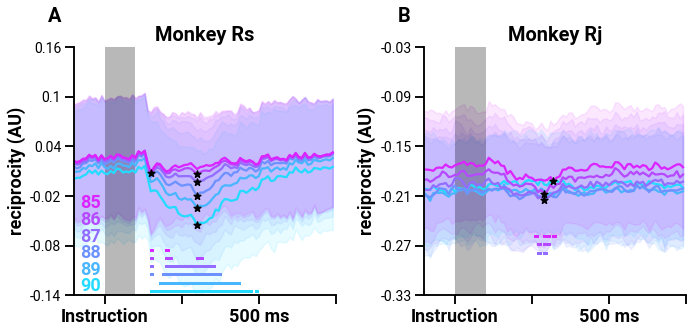

In [23]:
sns.set_context('talk')
afont = {'fontname':'Roboto','fontsize' : 18,'weight':'bold'}
bfont = {'fontname':'Roboto','fontsize' : 14}
hfont = {'fontname':'Roboto','fontsize' : 20,'weight':'bold'}

plt.figure(figsize=(10,5))
cols = 2
rows = 1
plot_num = 1 

kernel = Gaussian1DKernel(2)
subjects = ['RS','RJ']
types = ['norm']
num_nulls = {'RS':46,'RJ':45}
cutoff = 0.75
min_len = time2bin(cutoff,lastBin=True)

thresholds = np.arange(90,84,-1)
cmap = sns.color_palette("cool",len(thresholds))

titles = ['Normalized']
subject_names = ['Monkey Rs', 'Monkey Rj']#'Monkey Bx']

y_interval = 0.05
y_buffer = 0.15
buffer =0.01
for col, subject in enumerate(subjects):
    ty = 'norm'
    ylim_plot = {'min':1000,'max':-1000}

    ax = plt.subplot(rows,cols,plot_num)
    for i,th in enumerate(thresholds):
        filepath = [pjoin(folders[subject],file) for file in os.listdir(folders[subject])
        if file.startswith(f'{ty}_reciprocity-{num_nulls[subject]}-p{th}')]

        rec = loadPickle(filepath[0])
                
        rec_vals[th][subject][ty]['mean'] = np.mean(np.array([(np.array(x[:min_len])) for d,r in enumerate(rec) for t,x in enumerate(r)]),axis=0)
        rec_vals[th][subject][ty]['err'] = np.std(np.array([np.array(x[:min_len])  for d,r in enumerate(rec) for t,x in enumerate(r)]),axis=0)

        x = [bin2time(x,lastBin=True) for x in np.arange(min_len)]    
        

        plt.plot(x,rec_vals[th][subject][ty]['mean'],c=cmap[i],label=th)
        plt.fill_between(x,rec_vals[th][subject][ty]['mean']-rec_vals[th][subject][ty]['err'],rec_vals[th][subject][ty]['mean']+rec_vals[th][subject][ty]['err'],color=cmap[i],alpha=0.1)

        comp_start = time2bin(0,lastBin=True)
        comp_end = time2bin(0.1,lastBin=True)
        comp_val = np.mean(np.array([(np.array(x[comp_start:comp_end])) for d,r in enumerate(rec) for t,x in enumerate(r)]))
        plt.gca().axvspan(0,0.1,color='k',alpha=0.05,linewidth=0)
        
        comp_dist = [np.mean(x[comp_start:comp_end]) for d,r in enumerate(rec) for t,x in enumerate(r)]  
        p = [stats.ttest_ind([x[t] for d in rec for x in d],comp_dist)[1] for t in range(min_len)]
        p_corr = multipletests(p,0.01,method='bonferroni')
        ylim = y_bounds_norm[col]
        first_and_last_p[subject][th] = p_corr
        for x0,x1 in zip(first_and_last_seq(p_corr[0],True)[0],first_and_last_seq(p_corr[0],True)[1]):
            plt.plot([x[x0],x[x1]+0.005],[ylim+buffer*(i),ylim+buffer*(i)],c=cmap[i],linewidth=3)
            print(f'Subject {subject}: threshold {th}, time {x[x0]}s to {x[x1]}s,{p_corr[1][x0]}')

        y = rec_vals[th][subject][ty]['mean']

        x = [bin2time(x,lastBin=True) for x in np.arange(min_len)]    

        delay_start = time2bin(0,lastBin=True)
        delay_end = time2bin(1,lastBin=True)
        minima_idx = np.argmin(y[delay_start:delay_end])+delay_start
        minima_x = np.array(x)[minima_idx]
        minima_y = np.min(y[delay_start:delay_end]) 
        # get distribution of scores at minima
        minima_dist = [x[minima_idx] for d,r in enumerate(rec) for t,x in enumerate(r)]
        comp_dist = [np.mean(x[comp_start:comp_end]) for d,r in enumerate(rec) for t,x in enumerate(r)]
        # print(f'Subject {subject}, {ty}, {th} : p = {stats.ttest_ind(minima_dist,comp_dist)[1]}, minima at {minima_x}')
        if stats.ttest_ind(minima_dist,comp_dist)[1]<0.001:
            plt.scatter(minima_x,y[minima_idx],c='k',s=50, marker='*',zorder=20)

        if col == 0:
            if i==0:
                y0 = y_bounds_norm[col]
            ax.text(-0.08,y0+(i*0.02),str(th),c=cmap[i],**afont)
    
    sns.despine()

    ax.text(-0.1, 1.1, string.ascii_uppercase[plot_num-1], transform=ax.transAxes, 
    size=20, weight='bold')
    
    ticks = np.arange(0,1,0.25)
    labels = ['500 ms' if round(x,2)==0.5 else ' '  for x in ticks]
    ax.set_xlim([-0.10,0.75])
    labels[int(np.where(ticks==0)[0])] = 'Instruction'
    ax.set_xticks(ticks)
    ax.set_xticklabels(labels,**afont)
    ax.get_xticklabels()[1].set_weight("bold")

    ylim_plot = plt.gca().get_ylim()
    print(subject,ty,th,np.mean([ylim_plot[1],ylim_plot[0]]),np.diff([ylim_plot[1],ylim_plot[0]]))
    # ylim = plt.gca().get_ylim()



    mid_point = np.mean([ylim_plot[1],ylim_plot[0]])
    if subject=='RJ':
        mid_point -= 0.02
    y_pm = (0.3/2)
    
    ticks = np.arange(mid_point-y_pm+0.03,mid_point+y_pm+0.06,0.06)
    
    labels = [round(x,2)  for x in ticks]
    print(ticks)
    ax.set_yticks(ticks)
    
    ax.set_yticklabels(labels,**bfont)

    plot_num+=1
    plt.title(subject_names[col],**hfont)
    plt.ylabel('reciprocity (AU)',**afont)
    plt.ylim([min(ticks),max(ticks)])
plt.tight_layout()
plt.savefig(pjoin(fig_dir,'reciprocity-std-sig-01.png'))

## For supplementary: additional thresholds for Rj

In [ ]:
rec_vals={}
minima_times = {}
thresholds = np.arange(75,91)
for x in thresholds:
    rec_vals[x] = {'RS':{'data':{'mean':[],'err':[]},'ave-null':{'mean':[],'err':[]},'norm':{'mean':[],'err':[]}},
                'RJ':{'data':{'mean':[],'err':[]},'ave-null':{'mean':[],'err':[]},'norm':{'mean':[],'err':[]}}}
    minima_times[x] = {'RS':{'data':{'mean':[],'err':[]},'ave-null':{'mean':[],'err':[]},'norm':{'mean':[],'err':[]}},
                'RJ':{'data':{'mean':[],'err':[]},'ave-null':{'mean':[],'err':[]},'norm':{'mean':[],'err':[]}}}
rec_vals

In [ ]:
sns.set_context('talk')
afont = {'fontname':'Roboto','fontsize' : 18,'weight':'bold'}
bfont = {'fontname':'Roboto','fontsize' : 14}
hfont = {'fontname':'Roboto','fontsize' : 20,'weight':'bold'}

plt.figure(figsize=(5,5))
cols = 1
rows = 1
plot_num = 1 

kernel = Gaussian1DKernel(2)
subjects = ['RJ']
types = ['norm']
num_nulls = {'RS':46,'RJ':45}
cutoff = 1
min_len = time2bin(cutoff,lastBin=True)

thresholds = np.arange(85,74,-1)
cmap = sns.color_palette("cool",len(thresholds))

titles = ['Normalized']
subject_names = ['Monkey Rs', 'Monkey Rj']#'Monkey Bx']

y_interval = 0.05
y_buffer = 0.15
buffer =0.005
th_labels = 0
for col, subject in enumerate(subjects):
    ty = 'norm'
    ylim_plot = {'min':1000,'max':-1000}

    ax = plt.subplot(rows,cols,plot_num)
    for i,th in enumerate(thresholds):
        filepath = [pjoin(folders[subject],file) for file in os.listdir(folders[subject])
        if file.startswith(f'{ty}_reciprocity-{num_nulls[subject]}-p{th}')]

        try:
            rec = loadPickle(filepath[0])
                    
            rec_vals[th][subject][ty]['mean'] = np.mean(np.array([(np.array(x[:min_len])) for d,r in enumerate(rec) for t,x in enumerate(r)]),axis=0)
            rec_vals[th][subject][ty]['err'] = np.std(np.array([np.array(x[:min_len])  for d,r in enumerate(rec) for t,x in enumerate(r)]),axis=0)

            x = [bin2time(x,lastBin=True) for x in np.arange(min_len)]    
            

            plt.plot(x,rec_vals[th][subject][ty]['mean'],c=cmap[i],label=th)
            plt.fill_between(x,rec_vals[th][subject][ty]['mean']-rec_vals[th][subject][ty]['err'],rec_vals[th][subject][ty]['mean']+rec_vals[th][subject][ty]['err'],color=cmap[i],alpha=0.1)

            comp_start = time2bin(0,lastBin=True)
            comp_end = time2bin(0.1,lastBin=True)
            comp_val = np.mean(np.array([(np.array(x[comp_start:comp_end])) for d,r in enumerate(rec) for t,x in enumerate(r)]))
            plt.gca().axvspan(0,0.1,color='k',alpha=0.05,linewidth=0)
            
            comp_dist = [np.mean(x[comp_start:comp_end]) for d,r in enumerate(rec) for t,x in enumerate(r)]  
            p = [stats.ttest_ind([x[t] for d in rec for x in d],comp_dist)[1] for t in range(min_len)]
            p_corr = multipletests(p,0.01,method='bonferroni')
            ylim = -0.27861378409847604
            for x0,x1 in zip(first_and_last_seq(p_corr[0],True)[0],first_and_last_seq(p_corr[0],True)[1]):
                plt.plot([x[x0],x[x1]+0.005],[ylim+buffer*(i),ylim+buffer*(i)],c=cmap[i],linewidth=3)
                print(f'Subject {subject}: threshold {th}, time {x[x0]}s to {x[x1]}s')



            y = rec_vals[th][subject][ty]['mean']

            x = [bin2time(x,lastBin=True) for x in np.arange(min_len)]    

            delay_start = time2bin(0,lastBin=True)
            delay_end = time2bin(1,lastBin=True)
            minima_idx = np.argmin(y[delay_start:delay_end])+delay_start
            minima_x = np.array(x)[minima_idx]
            minima_y = np.min(y[delay_start:delay_end]) 
            # get distribution of scores at minima
            minima_dist = [x[minima_idx] for d,r in enumerate(rec) for t,x in enumerate(r)]
            comp_dist = [np.mean(x[comp_start:comp_end]) for d,r in enumerate(rec) for t,x in enumerate(r)]
            if stats.ttest_ind(minima_dist,comp_dist)[1]<0.001:
                plt.scatter(minima_x,y[minima_idx],c='k',s=50, marker='*',zorder=20)
            if col == 0:
                if i==0:
                    y0 = -0.27861378409847604 + 0.01
                ax.text(-0.08,y0+(i*0.01),str(th),c=cmap[i],**afont)
                th_labels+=1
        except Exception as e: print(e,th)

    
    sns.despine()

    ax.text(-0.1, 1.1, string.ascii_uppercase[plot_num-1], transform=ax.transAxes, 
    size=20, weight='bold')
    
    ticks = np.arange(0,1,0.25)
    labels = ['500 ms' if round(x,2)==0.5 else ' '  for x in ticks]
    ax.set_xlim([-0.10,0.75])
    labels[int(np.where(ticks==0)[0])] = 'Instruction'
    ax.set_xticks(ticks)
    ax.set_xticklabels(labels,**afont)
    ax.get_xticklabels()[1].set_weight("bold")

    ylim_plot = plt.gca().get_ylim()
    print(subject,ty,th,np.mean([ylim_plot[1],ylim_plot[0]]),np.diff([ylim_plot[1],ylim_plot[0]]))


    mid_point = np.mean([ylim_plot[1],ylim_plot[0]])
    y_pm = (0.3/2)
    
    ticks = np.arange(mid_point-y_pm,mid_point+y_pm+0.06,0.06)
    
    labels = [round(x,2)  for x in ticks]
    print(ticks)
    ax.set_yticks(ticks)
    
    ax.set_yticklabels(labels,**bfont)

    plot_num+=1
    plt.title(subject_names[1],**hfont)
    plt.ylabel('reciprocity (AU)',**afont)
    plt.ylim([min(ticks),max(ticks)])
plt.tight_layout()
plt.savefig(pjoin(fig_dir,'reciprocity-std-sup.png'))